In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/AMAZON_daily.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure and contents
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [ ]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Checking for any anomalies like extreme outliers
statistical_summary = data.describe()

missing_values, statistical_summary


(Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64,
               Open         High          Low        Close    Adj Close  \
 count  6712.000000  6712.000000  6712.000000  6712.000000  6712.000000   
 mean     34.514489    34.929023    34.066458    34.506347    34.506347   
 std      50.314902    50.903834    49.672280    50.289860    50.289860   
 min       0.070313     0.072396     0.065625     0.069792     0.069792   
 25%       2.045250     2.083875     2.000000     2.047000     2.047000   
 50%       7.314000     7.452250     7.276000     7.411250     7.411250   
 75%      47.447501    47.773749    47.080999    47.448624    47.448624   
 max     187.199997   188.654007   184.839493   186.570496   186.570496   
 
              Volume  
 count  6.712000e+03  
 mean   1.399859e+08  
 std    1.389203e+08  
 min    9.744000e+06  
 25%    6.683000e+07  
 50%    1.036150e+08  
 75%    1.584245e+08  
 max    2.08

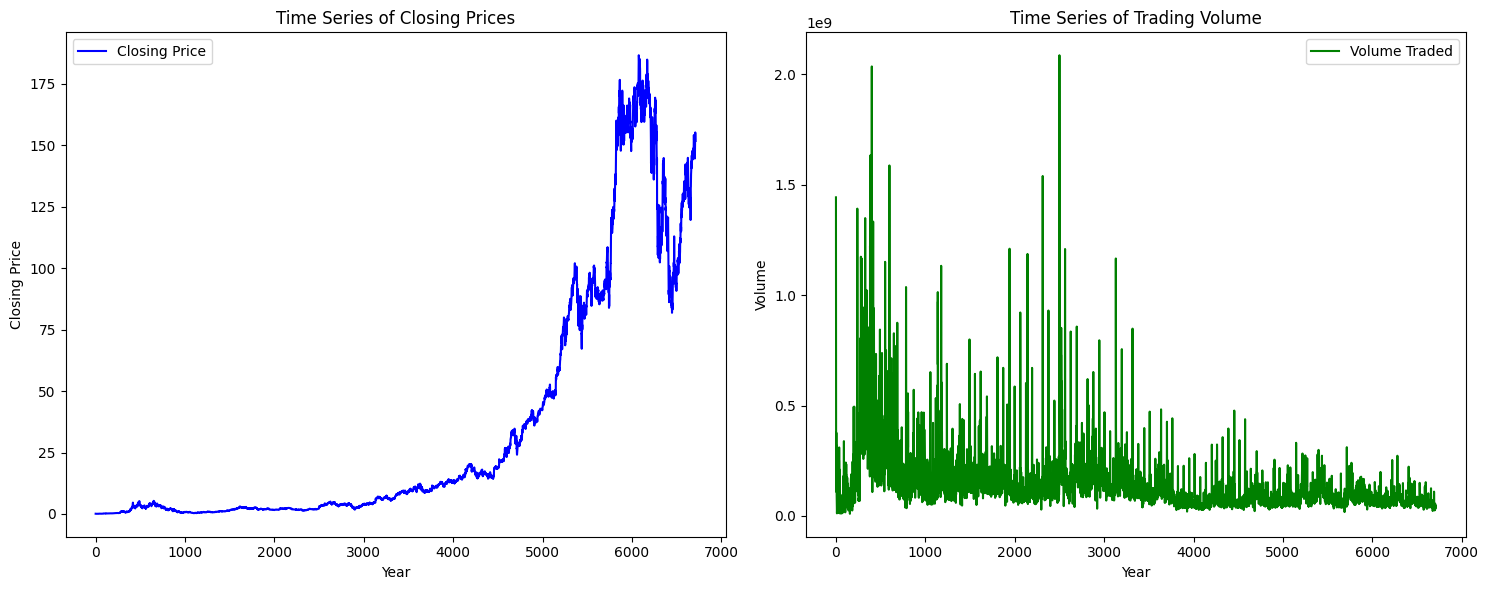

In [ ]:
# Plotting the Closing Price and Volume to observe trends and seasonality

plt.figure(figsize=(15, 6))

# Plotting Closing Price
plt.subplot(1, 2, 1)
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.title('Time Series of Closing Prices')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.legend()

# Plotting Volume
plt.subplot(1, 2, 2)
plt.plot(data['Volume'], label='Volume Traded', color='green')
plt.title('Time Series of Trading Volume')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()


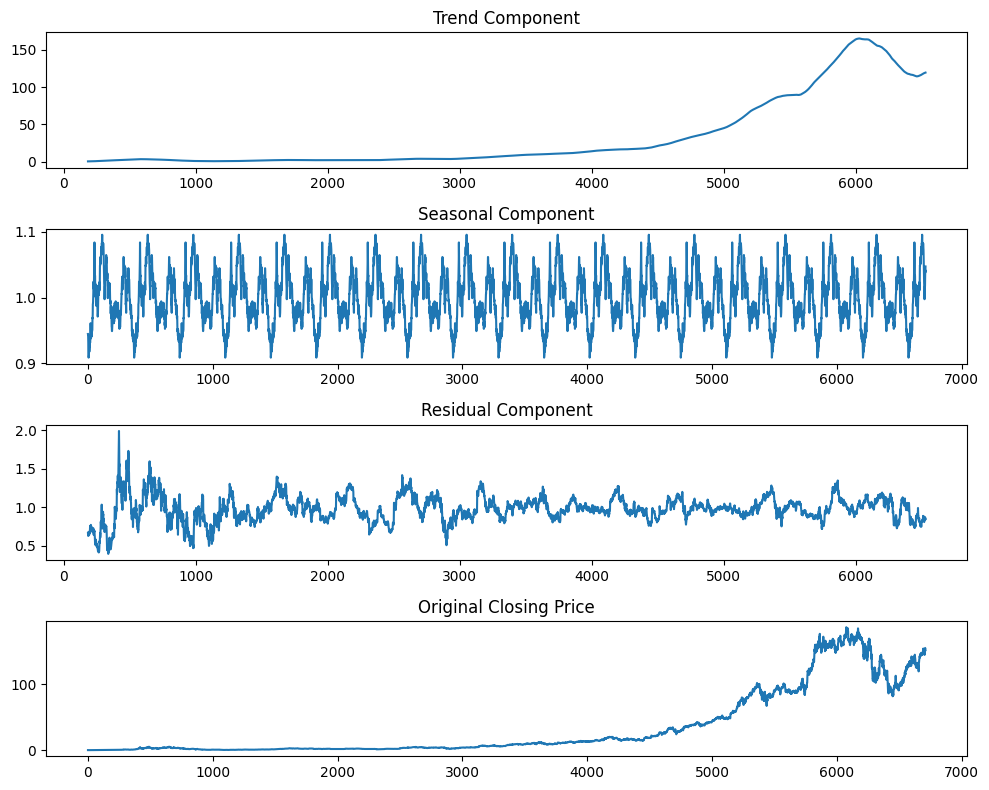

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the Closing Price Time Series
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=365)

# Plotting the decomposed components
plt.figure(figsize=(10, 8))

# Trend Component
plt.subplot(4, 1, 1)
plt.plot(decomposition.trend)
plt.title('Trend Component')

# Seasonal Component
plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal)
plt.title('Seasonal Component')

# Residual Component
plt.subplot(4, 1, 3)
plt.plot(decomposition.resid)
plt.title('Residual Component')

# Original Closing Price
plt.subplot(4, 1, 4)
plt.plot(data['Close'])
plt.title('Original Closing Price')

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Performing the Augmented Dickey-Fuller test
adf_test = adfuller(data['Close'])

# Extracting the test statistic and p-value
adf_statistic, p_value = adf_test[0], adf_test[1]

# Critical values for different confidence levels
critical_values = adf_test[4]

adf_statistic, p_value, critical_values



(0.4532016197339522,
 0.9833791031757089,
 {'1%': -3.4313297537494396,
  '5%': -2.8619729691501026,
  '10%': -2.5670004658825696})

In [ ]:
# Applying first-order differencing
data_diff = data['Close'].diff().dropna()

# Performing the Augmented Dickey-Fuller test on the differenced data
adf_test_diff = adfuller(data_diff)

# Extracting the test statistic and p-value for the differenced data
adf_statistic_diff, p_value_diff = adf_test_diff[0], adf_test_diff[1]

# Critical values for the differenced data
critical_values_diff = adf_test_diff[4]

adf_statistic_diff, p_value_diff, critical_values_diff



(-14.707010897449464,
 2.886781366392843e-27,
 {'1%': -3.4313297537494396,
  '5%': -2.8619729691501026,
  '10%': -2.5670004658825696})

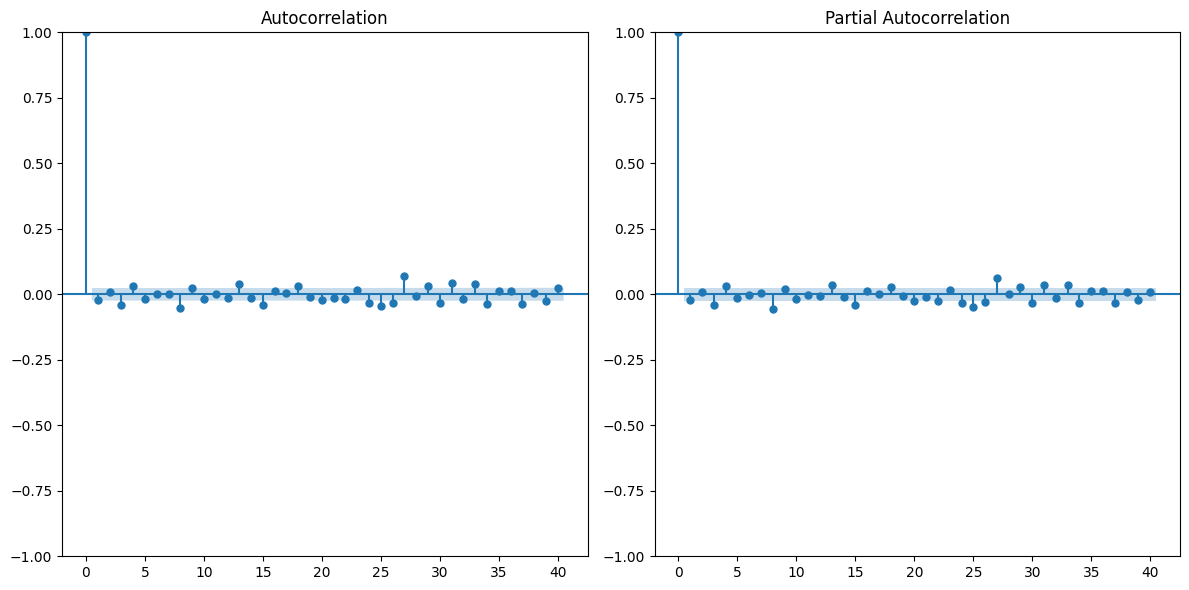

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(data_diff, ax=plt.gca(), lags=40)

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(data_diff, ax=plt.gca(), lags=40)

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Building the ARIMA(1,1,1) model
model_arima = ARIMA(data['Close'], order=(3, 1, 3))
model_arima_fit = model_arima.fit()

# Summary of the model
model_summary = model_arima_fit.summary()
model_summary



/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 6712
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -11244.383
Date:                Thu, 25 Jan 2024   AIC                          22502.766
Time:                        18:12:27   BIC                          22550.447
Sample:                             0   HQIC                         22519.231
                               - 6712                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8044      0.037    -21.637      0.000      -0.877      -0.732
ar.L2          0.5538      0.063      8.772      0.000       0.430       0.678
ar.L3          0.8679      0.036     23.974      0.000       0.797       0.939
ma.L1          0.7958      0.035     22.795      0.000       0.727       0.864
ma.L2         -0.5615      0.060     -9.435      0.000      -0.678      -0.445
ma.L3         -0.8929      0.035    -25.864      0.000      -0.961      -0.825
sigma2         1.6695      0.007    229.409      0.000       1.655       1.684
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):            295643.44
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):             485.61   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

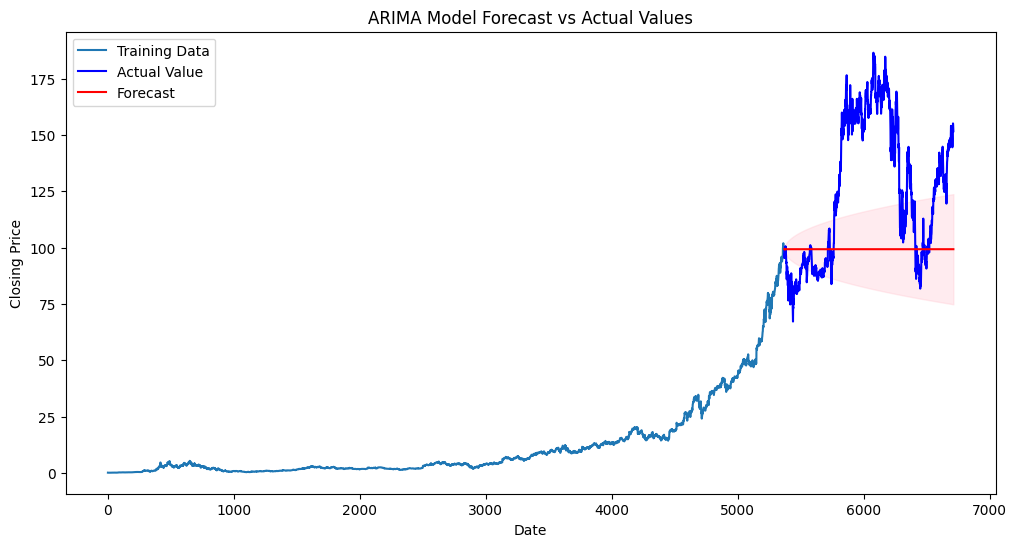

In [ ]:
# Splitting the data into training and test sets (80% train, 20% test)
train_size = int(len(data) * 0.8)
train_data, test_data = data[0:train_size], data[train_size:]

# Fitting the ARIMA model on the training set
model_arima_train = ARIMA(train_data['Close'], order=(3, 1, 3))
model_arima_fit_train = model_arima_train.fit()

# Making predictions on the test set
predictions = model_arima_fit_train.get_forecast(steps=len(test_data))
predicted_values = predictions.predicted_mean
predicted_ci = predictions.conf_int()

# Plotting the predictions along with the actual values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(test_data.index, test_data['Close'], label='Actual Value', color='blue')
plt.plot(test_data.index, predicted_values, label='Forecast', color='red')
plt.fill_between(predicted_ci.index, predicted_ci.iloc[:, 0], predicted_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Model Forecast vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

# Preparing the data for LSTM
def prepare_lstm_data(data, time_step):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60  # Number of time steps to look back
X, Y = prepare_lstm_data(scaled_data, time_step)

# Splitting the data into train and test sets
train_size_lstm = int(len(X) * 0.8)
X_train, Y_train = X[:train_size_lstm], Y[:train_size_lstm]
X_test, Y_test = X[train_size_lstm:], Y[train_size_lstm:]

# Reshaping input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Building the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model_lstm.fit(X_train, Y_train, batch_size=32, epochs=50, verbose=1)


Epoch 1/100
167/167 [==============================] - 12s 48ms/step - loss: 2.9026e-04
Epoch 2/100
167/167 [==============================] - 8s 47ms/step - loss: 2.3852e-05
Epoch 3/100
167/167 [==============================] - 8s 50ms/step - loss: 2.3992e-05
Epoch 4/100
167/167 [==============================] - 8s 47ms/step - loss: 2.2639e-05
Epoch 5/100
167/167 [==============================] - 8s 47ms/step - loss: 2.8715e-05
Epoch 6/100
167/167 [==============================] - 9s 55ms/step - loss: 2.5995e-05
Epoch 7/100
167/167 [==============================] - 8s 49ms/step - loss: 2.2158e-05
Epoch 8/100
167/167 [==============================] - 8s 45ms/step - loss: 2.0943e-05
Epoch 9/100
167/167 [==============================] - 8s 50ms/step - loss: 2.3459e-05
Epoch 10/100
167/167 [==============================] - 8s 49ms/step - loss: 1.8909e-05
Epoch 11/100
167/167 [==============================] - 8s 45ms/step - loss: 2.0759e-05
Epoch 12/100
167/167 [==================

KeyboardInterrupt: 

In [ ]:
# Make predictions
predicted_lstm = model_lstm.predict(X_test)
predicted_lstm = scaler.inverse_transform(predicted_lstm)  # Inverse transform to original scale


42/42 [==============================] - 1s 15ms/step


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
# Actual values need to be inverse transformed as they were scaled
actual_lstm = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate RMSE and MAE
rmse_lstm = mean_squared_error(actual_lstm, predicted_lstm, squared=False)
mae_lstm = mean_absolute_error(actual_lstm, predicted_lstm)

print(f'LSTM RMSE: {rmse_lstm}, LSTM MAE: {mae_lstm}')


LSTM RMSE: 3.0462652247915036, LSTM MAE: 2.2172074866061995


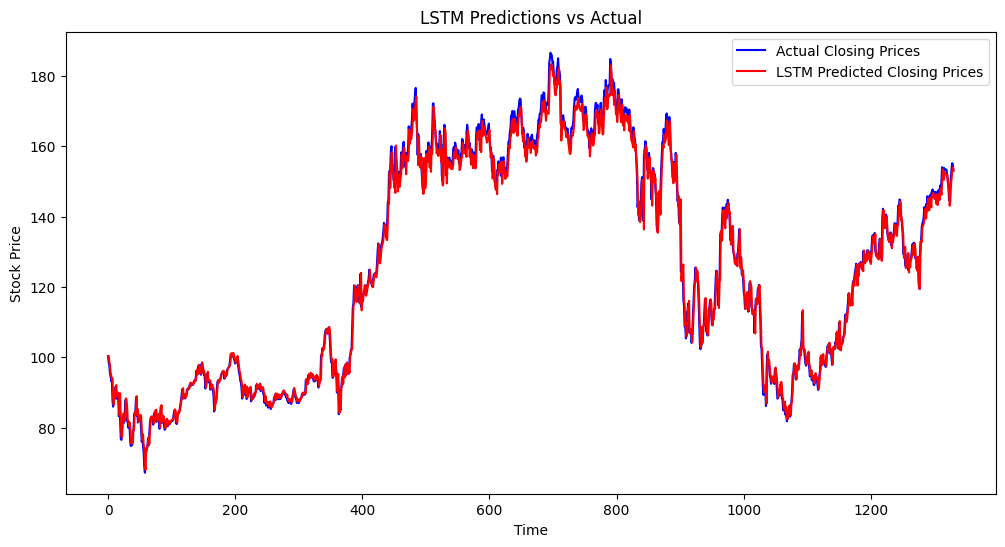

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(actual_lstm, label='Actual Closing Prices', color='blue')
plt.plot(predicted_lstm, label='LSTM Predicted Closing Prices', color='red')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
prophet_data = data.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})


In [ ]:
!pip install prophet

In [ ]:
!pip install pystan~=2.14

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp310-cp310-linux_x86_64.whl size=61975552 sha256=4c77f3c5f41ffc9cf71e4a63b2a7bfc0c97f68f72a93039fb4f66fb2f4c62c04
  Stored in directory: /root/.cache/pip/wheels/3d/1c/94/4516243362eedbedad15ac4389691ee3bf2d45bec2639c9d8b
Successfully built pystan


In [ ]:
import prophet

from prophet import Prophet

# Create a Prophet model instance
prophet_model = Prophet()

# Fit the model
prophet_model.fit(prophet_data)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2g5qnode/b86avap3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2g5qnode/icuwf0y6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16090', 'data', 'file=/tmp/tmp2g5qnode/b86avap3.json', 'init=/tmp/tmp2g5qnode/icuwf0y6.json', 'output', 'file=/tmp/tmp2g5qnode/prophet_modelbuwcyuug/prophet_model-20240125182637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:26:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:26:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a future dataframe for a specified period (e.g., 365 days)
future = prophet_model.make_future_dataframe(periods=365)

# Make predictions
forecast = prophet_model.predict(future)


In [ ]:
future

,ds
0,1997-05-15
1,1997-05-16
2,1997-05-19
3,1997-05-20
4,1997-05-21
...,...
7072,2025-01-12
7073,2025-01-13
7074,2025-01-14
7075,2025-01-15


In [ ]:
# To evaluate, you need actual values for the same period as your forecast.
# Assuming 'actual_values' contains the actual data for the forecasted period

forecasted_values = forecast['yhat'][-365:]  # Last 365 days' predictions

# Calculate RMSE and MAE
rmse_prophet = mean_squared_error(actual_values, forecasted_values, squared=False)
mae_prophet = mean_absolute_error(actual_values, forecasted_values)

print(f'Prophet RMSE: {rmse_prophet}, Prophet MAE: {mae_prophet}')


In [ ]:
# prompt: make forecasted_valuesa dataframe

forecasted_dataframe = pd.DataFrame(forecasted_values, columns=['yhat'])


In [ ]:
future.shape
forecasted_dataframe.shape

(365, 1)

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'actual_data' with actual values and corresponding dates
# And 'forecasted_values' contains the forecasted values from Prophet with the same dates

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Actual Values', color='blue')
plt.plot(future['ds'], forecasted_dataframe['yhat'], label='Forecasted Values', color='red')

plt.title('Prophet Forecast vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


TypeError: tz must be string or tzinfo subclass.

Error in callback <function _draw_all_if_interactive at 0x7b1e075fa7a0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7b1e075f9a20> (for post_execute):


KeyboardInterrupt: 

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

# Plot the forecast
plot_plotly(prophet_model, forecast)

# Plot the forecast components
plot_components_plotly(prophet_model, forecast)
